In [7]:
import sys
import os
import json

# Add parent directory to sys.path so 'core' modules can be imported
sys.path.append(os.path.abspath(".."))

from core.black_scholes import black_scholes_call, black_scholes_put
from core.greeks import call_greeks
from core.monte_carlo import monte_carlo_call_price





In [8]:
# Load inputs from JSON
with open("../data/sample_inputs.json") as f:
    inputs = json.load(f)

S = inputs["S"]
K = inputs["K"]
T = inputs["T"]
r = inputs["r"]
sigma = inputs["sigma"]
option_type = inputs["option_type"]

print("Loaded Inputs:", inputs)



Loaded Inputs: {'S': 100.0, 'K': 100.0, 'T': 1.0, 'r': 0.05, 'sigma': 0.2, 'option_type': 'Call'}


In [9]:
if option_type == "Call":
    price_bs = black_scholes_call(S, K, r, sigma, T)
else:
    price_bs = black_scholes_put(S, K, r, sigma, T)

print(f"{option_type} Option Price (Black-Scholes): {round(price_bs, 4)}")



Call Option Price (Black-Scholes): 10.4506


In [10]:
greeks = call_greeks(S, K, r, sigma, T)
print("Option Greeks and Price:")
for key, value in greeks.items():
    print(f"{key}: {round(value, 4)}")



Option Greeks and Price:
price: 10.4506
delta: 0.6368
gamma: 0.0188
theta: -6.414
vega: 37.524
rho: 53.2325


In [11]:
mc_price, ST = monte_carlo_call_price(S, K, r, sigma, T, num_paths=100000)
print(f"Monte Carlo Call Price: {round(mc_price, 4)}")


Monte Carlo Call Price: 10.4014


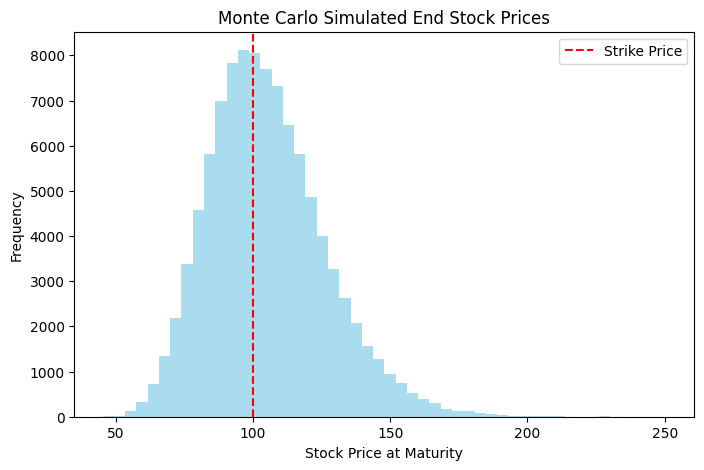

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(ST, bins=50, alpha=0.7, color='skyblue')
plt.axvline(K, color='red', linestyle='--', label='Strike Price')
plt.title('Monte Carlo Simulated End Stock Prices')
plt.xlabel('Stock Price at Maturity')
plt.ylabel('Frequency')
plt.legend()
plt.show()
